In [30]:
import csv
with open('hrishipara_financial_diaries.csv') as var_name:
    reader=csv.reader(var_name)
    A = [row for row in reader]
import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
df = pd.DataFrame(A)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df['code']=df['code'].str.upper()
df['description']=df['description'].str.lower()
df["takaout"] = pd.to_numeric(df["takaout"])
df["takain"] = pd.to_numeric(df["takain"])
df['date']=pd.to_datetime(df.date)
df.head()

,date,ref,code,class,description,subclass,tag,takain,takaout,details,notes,flow,type,quartile
1,2015-05-20,descript,02OBM,IRI,rickshaw income,rickshaw driving,bb,260,0,rickshaw,"Rickshaw driving 02obm is 35, rickshaw driver,...",in,income,3
2,2015-05-20,descript,01KIF,IWA,earned income,shop labour,no rec,40,0,vegetable shop,"Wages 01kif , widow, 45. One person hh (she ha...",in,income,4
3,2015-05-20,no rec,01KIF,IWA,earned income,shop labour,no rec,10,0,vegetable shop,no rec,in,income,4
4,2015-05-20,no rec,01KIF,ETE,"snacks, treats, stimulants","betel nut, leaf",no rec,0,-5,betel nut,no rec,out,expenditure,4
5,2015-05-20,no rec,01KIF,ETR,transport costs,ferry,no rec,0,-4,boat,no rec,out,costs,4


In [31]:
dfID={}
ID = ['02OBM', '01KIF', '03SAF', '04MAM', '07MOM', '06SRF', '05RAF',
       '08SHF', '10AFM', '09SMM', '11SUM', '12KAF', '13NMM', '14HYM',
       '18BIM', '15IBM', '17ATF', '16ANM', '20ROF', '19MDM', '21PJM',
       '22ALM', '24ABM', '23HRM', '25HEM', '26BIF', '27HDM', '29ARM',
       '28HIM', '30HBM', '35PTF', '31NLF', '33AKF', '34NYF', '36SKM',
       '32FUF', '38JHF', '37HSM', '39SNF', '40RBF', '41RZF', '43SNM',
       '44RJM', '42LAF', '45ADM', '47AZM', '46MZM', '49YEM', '48RMM',
       '50HZM', '70JOM', '65MOF', '69JIM', '58SHF', '67SIM', '61RDF',
       '64SRF', '63GRF', '57SEF', '55RHF', '68MAM', '59SRF', '62ARM',
       '53RKF', '54HOF', '66TUF', '51SYF', '52KBY', '56BAF', '60AJF',
       '71UDM', '72SHM']
for i in ID:
    x = df.drop(df[(df.code!= i)].index)
    dfID[i]=x

In [32]:
dfHC={}
for i in ID:
    y=dfID[i].drop(dfID[i][(dfID[i].description!="home construction")].index)
    dfHC[i]=y

In [33]:
dfHC_month={}
for i in ID:
    z=dfHC[i].groupby([pd.Grouper(key='date',freq='M')])['takaout'].sum()
    z=z.to_frame()
    dfHC_month[i]=z
    

In [34]:
dfIn_month={}
for i in ID:
    a=dfID[i].groupby([pd.Grouper(key='date',freq='M')])['takain'].sum()
    a=a.to_frame()
    a=a.reset_index()
    dfIn_month[i]=a

In [36]:
dfInavg_month={}
for i in ID:
    Sum=dfIn_month[i]['takain'].sum()
    Avg=Sum/len(dfIn_month[i].index)
    dfInavg_month[i]=Avg
    

In [47]:
dfIn_month2=dfIn_month

In [53]:
dfIn_month2[i].drop(dfIn_month2[i].loc[dfIn_month2[i]['date'] < dfHC_month[i].index[0]].index, inplace=True)
dfIn_month2[i].drop(dfIn_month2[i].loc[dfIn_month2[i]['date'] > dfHC_month[i].index[-1]].index, inplace=True)
#df5i.drop(df5i.loc[df5i['date'] < '2017-03-31'].index, inplace=True)

In [61]:
dfInratio_month={}
for i in ID:
    b=dfIn_month2[i]['takain']/dfInavg_month[i]
    dfInratio_month[i]=b

The figure below is about 02OBM
The figure below is about 01KIF


ValueError: x and y must be the same size

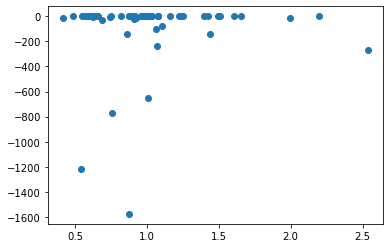

In [63]:
import matplotlib.pyplot as plt
for i in ID:
    print('The figure below is about', i)
    plt.scatter(dfInratio_month[i],dfHC_month[i]['takaout'])

ValueError: x and y must be the same size

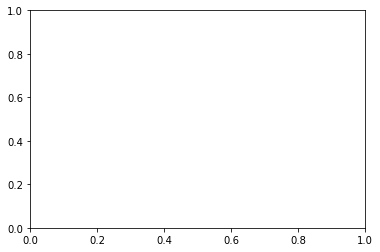

In [64]:
plt.scatter(dfInratio_month["05RAF"],dfHC_month["05RAF"]['takaout'])

In [58]:
dfInavg_month['02OBM']

13075.57142857143

In [65]:
dfInratio_month["05RAF"]

0     1.736301
1     1.802751
2     2.746871
3     1.239575
4     1.450182
5     1.747285
6     1.897392
7     1.471417
8     1.228408
9     2.554386
10    5.552778
11    1.743624
12    2.956289
13    0.868974
14    0.623311
15    0.777537
16    1.012400
17    0.568852
18    0.998762
19    1.385563
20    1.092305
21    1.007274
22    2.218567
23    1.687425
24    2.082829
25    0.690676
26    0.620108
27    0.528579
28    0.693788
29    0.751726
30    0.410781
31    0.980823
32    0.836939
33    0.583679
34    0.751909
35    1.138801
36    0.849113
37    0.983385
38    0.958673
39    0.857350
40    0.741475
41    0.606378
42    0.442542
43    0.540203
44    0.607751
45    0.839777
46    0.608758
47    0.689029
48    0.229371
49    0.520067
50    0.403550
51    0.400072
52    0.307262
53    0.708341
54    0.320076
55    0.762893
56    0.044666
57    0.527480
58    0.207404
59    0.384787
60    0.190838
61    1.636169
62    0.195963
63    0.217106
64    0.259118
65    0.168688
66    0.35

In [52]:
dfHC_month['02OBM']

,takaout
date,
2015-11-30,-770
2015-12-31,-15
2016-01-31,-10
2016-02-29,0
2016-03-31,0
2016-04-30,0
2016-05-31,0
2016-06-30,-15
2016-07-31,0


In [66]:
dfHC_month["05RAF"]['takaout']

date
2017-03-31      -30
2017-04-30        0
2017-05-31        0
2017-06-30        0
2017-07-31        0
2017-08-31        0
2017-09-30        0
2017-10-31        0
2017-11-30        0
2017-12-31        0
2018-01-31        0
2018-02-28        0
2018-03-31        0
2018-04-30    -1500
2018-05-31        0
2018-06-30    -4000
2018-07-31        0
2018-08-31        0
2018-09-30        0
2018-10-31    -3500
2018-11-30        0
2018-12-31        0
2019-01-31        0
2019-02-28        0
2019-03-31        0
2019-04-30        0
2019-05-31        0
2019-06-30        0
2019-07-31        0
2019-08-31        0
2019-09-30        0
2019-10-31        0
2019-11-30        0
2019-12-31        0
2020-01-31        0
2020-02-29      -85
2020-03-31        0
2020-04-30        0
2020-05-31        0
2020-06-30        0
2020-07-31        0
2020-08-31        0
2020-09-30   -14900
Freq: M, Name: takaout, dtype: int64

In [ ]:
dfin